#MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)

Importing the Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

shape of the numpy arrays

In [ ]:

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [ ]:

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


displaying the image

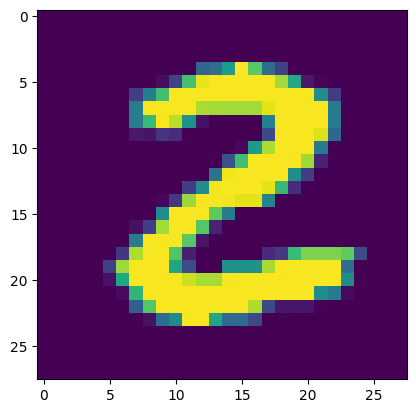

2


In [ ]:


plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

Image Lables

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

scaling the values

In [ ]:


X_train = X_train/255
X_test = X_test/255

printing the 10th image

In [ ]:


print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compiling the Neural Network

In [ ]:


model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

training the Neural Network

In [ ]:


model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8519 - loss: 0.5070
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9544 - loss: 0.1528
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9676 - loss: 0.1068
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9753 - loss: 0.0820
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9799 - loss: 0.0669
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9837 - loss: 0.0548
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0470
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9883 - loss: 0.0395
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0349
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9904 - loss: 0.0307


Training data accuracy 99.04

Accuracy on Test data:

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9646 - loss: 0.1516
0.9677000045776367


Test data accuracy = 97.1%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


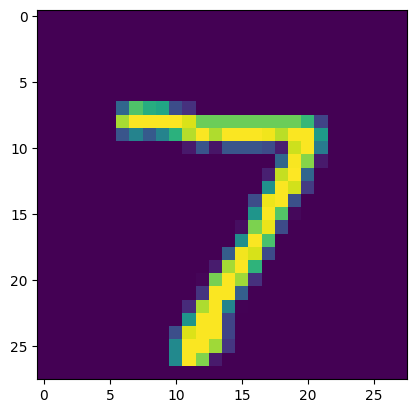

In [ ]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[3.0276430e-04 1.6416822e-04 3.5786475e-03 9.6342874e-01 1.3957234e-05
 1.4366432e-02 1.6137519e-10 9.9998337e-01 2.3591056e-01 9.8665476e-01]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)


[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [ ]:
import numpy as np
Y_pred_labels = [np.argmax(i) for i in Y_pred]
x = np.int64(Y_pred_labels[0]) # Select the first element of the array.
y = int(x)  # Convert to native Python int

print(type(y))  # <class 'int'>
print(y)        # 7

<class 'int'>
7


In [ ]:
Y_pred_labels = [int(np.argmax(i)) for i in Y_pred]
print(Y_pred_labels)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 3, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 8, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 6, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

##Confusin Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 954    0    1    1    1    3    8    0    2   10]
 [   0 1112    3    4    0    1    8    1    6    0]
 [   5    0  983   18    1    0    9    4   11    1]
 [   1    0    0  990    0    4    0    6    2    7]
 [   1    0   11    0  929    4   14    2    2   19]
 [   3    0    0   13    2  857    7    0    6    4]
 [   4    1    0    0    1    5  947    0    0    0]
 [   1    0   10    7    1    0    0  976    4   29]
 [   0    1    2   11    2    7    3    2  940    6]
 [   1    0    0    7    5    2    1    3    1  989]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

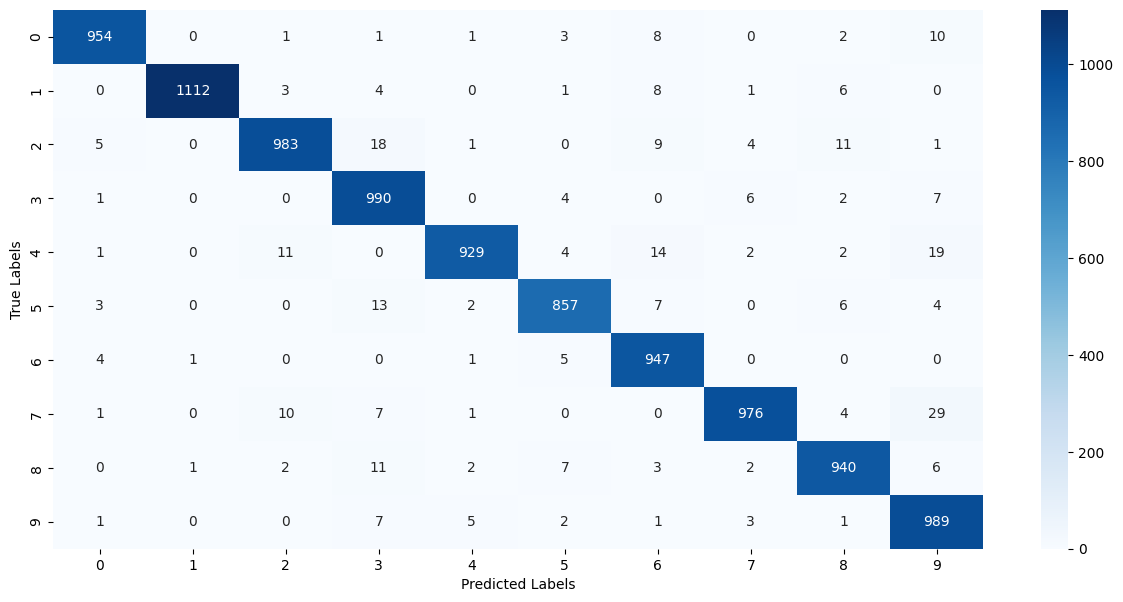

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [110]:
input_image_path = '/content/7.png'

input_image = cv2.imread(input_image_path)

In [111]:
type(input_image)

numpy.ndarray

In [112]:
print(input_image)

[[[ 96  96  96]
  [ 60  60  60]
  [ 63  63  63]
  ...
  [ 63  63  63]
  [ 52  52  52]
  [170 170 170]]

 [[ 60  60  60]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [152 152 152]]

 [[ 63  63  63]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [152 152 152]]

 ...

 [[ 63  63  63]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [152 152 152]]

 [[ 63  63  63]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [152 152 152]]

 [[ 63  63  63]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [152 152 152]]]


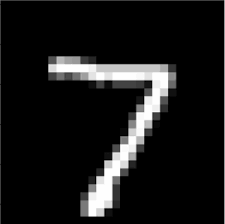

In [113]:
cv2_imshow(input_image)

In [114]:
input_image.shape

(224, 225, 3)

In [115]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

In [116]:
grayscale.shape

(224, 225)

In [117]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [118]:
input_image_resize.shape

(28, 28)

In [119]:
cv2_imshow(input_image_resize)

In [120]:
input_image_resize = input_image_resize.astype('float32') / 255.0


In [121]:
type(input_image_resize)

numpy.ndarray

In [122]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

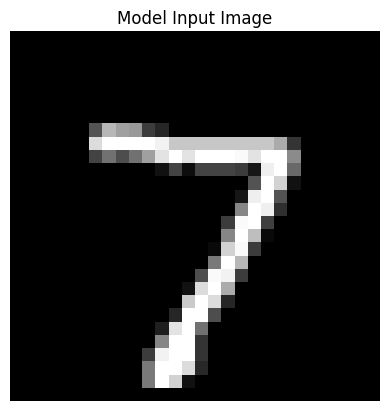

In [123]:
import matplotlib.pyplot as plt

plt.imshow(input_image_resize, cmap='gray')
plt.title("Model Input Image")
plt.axis('off')
plt.show()


In [124]:
print(model.input_shape)


(None, 28, 28)


In [125]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[3.2828210e-04 1.5791118e-04 3.4432050e-03 9.6457285e-01 1.5178935e-05
  1.3024406e-02 1.5812629e-10 9.9998373e-01 2.3276582e-01 9.8801064e-01]]


In [126]:
input_pred_label = np.argmax(input_prediction)

In [127]:
print(input_pred_label)

7


Predictive System

Path of the image to be predicted: /content/7.png


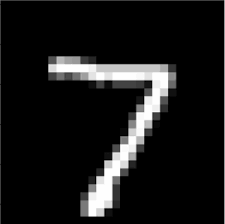

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The Handwritten Digit is recognised as: 7


In [128]:
input_image_path = input("Path of the image to be predicted: ")

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize.astype('float32') / 255.0

# Add channel dimension
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshaped)
input_pred_label = int(np.argmax(input_prediction))  # Ensure it's a native int

print('The Handwritten Digit is recognised as:', input_pred_label)


Path of the image to be predicted: /content/Screenshot 2025-04-09 131812.png


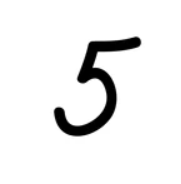

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
The Handwritten Digit is recognised as: 5


In [129]:
input_image_path = input("Path of the image to be predicted: ")

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize.astype('float32') / 255.0

# Add channel dimension
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshaped)
input_pred_label = int(np.argmax(input_prediction))  # Ensure it's a native int

print('The Handwritten Digit is recognised as:', input_pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


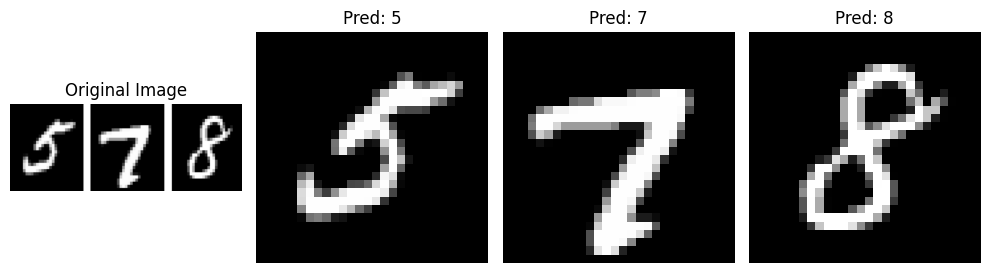

In [133]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
input_image_path = "/content/Screenshot 2025-04-09 132040.png"
input_image = cv2.imread(input_image_path)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Threshold the image to get binary image
_, thresh = cv2.threshold(grayscale, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours (external only)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours from left to right using the x coordinate
bounding_boxes = [cv2.boundingRect(c) for c in contours]
sorted_contours = [c for _, c in sorted(zip(bounding_boxes, contours), key=lambda b: b[0][0])]

# Display original image
plt.figure(figsize=(10, 3))
plt.subplot(1, len(sorted_contours)+1, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Process and predict each digit
for i, contour in enumerate(sorted_contours):
    x, y, w, h = cv2.boundingRect(contour)
    digit = grayscale[y:y+h, x:x+w]

    # Resize and normalize
    digit_resized = cv2.resize(digit, (28, 28))
    digit_normalized = digit_resized.astype('float32') / 255.0
    digit_reshaped = np.reshape(digit_normalized, [1, 28, 28])

    # Predict using your model
    prediction = model.predict(digit_reshaped)
    label = int(np.argmax(prediction))

    # Show each digit with prediction
    plt.subplot(1, len(sorted_contours)+1, i+2)
    plt.imshow(digit_resized, cmap='gray')
    plt.title(f"Pred: {label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


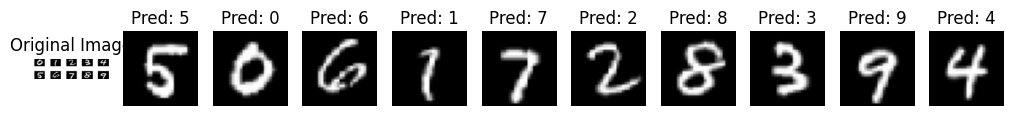

In [134]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
input_image_path = "/content/digits.png"
input_image = cv2.imread(input_image_path)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Threshold the image to get binary image
_, thresh = cv2.threshold(grayscale, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours (external only)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours from left to right using the x coordinate
bounding_boxes = [cv2.boundingRect(c) for c in contours]
sorted_contours = [c for _, c in sorted(zip(bounding_boxes, contours), key=lambda b: b[0][0])]

# Display original image
plt.figure(figsize=(10, 3))
plt.subplot(1, len(sorted_contours)+1, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Process and predict each digit
for i, contour in enumerate(sorted_contours):
    x, y, w, h = cv2.boundingRect(contour)
    digit = grayscale[y:y+h, x:x+w]

    # Resize and normalize
    digit_resized = cv2.resize(digit, (28, 28))
    digit_normalized = digit_resized.astype('float32') / 255.0
    digit_reshaped = np.reshape(digit_normalized, [1, 28, 28])

    # Predict using your model
    prediction = model.predict(digit_reshaped)
    label = int(np.argmax(prediction))

    # Show each digit with prediction
    plt.subplot(1, len(sorted_contours)+1, i+2)
    plt.imshow(digit_resized, cmap='gray')
    plt.title(f"Pred: {label}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [135]:
# Save the trained model
model.save("mnist_digit_model.h5")
